### Lab 2 in DAVE3625

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
## import and check the different null values
df = pd.read_csv("https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab%202/data/Titanic.csv")
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
df["Age"] = df["Age"].fillna(df["Age"].median()) #fill all the empty age values to median 

df["Fare"] = df["Fare"].fillna(df["Fare"].median()) #does not need to be a int, as it gets converted to binarty either way 
df["HasCabin"] = ~df.Cabin.isnull() # ~ == !, flips the boolean

df["Embarked"] = df["Embarked"].fillna("S") #fills all the empty values to S (not sure why)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [17]:
filter = lambda x: re.search(' ([A-Z[a-z]+)\.', x).group(1) #regexp filler
df["title"] = df.Name.apply(filter) #applies the regexp
df.head() #To controll the look of the table, can be removed 
df["title"].value_counts() #counts all the titles

title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [18]:
inSet =  ['Mlle', 'Ms', 'Mme'] #finds the variations
replace = ['Miss','Miss','Mr'] #replaces the variations
uniqe = ["Don", "Lady", "Sir", "Capt", "Countess", "Jonkheer", "Dona", "Rev", "Col", "Ms", "Major", "Dr", "Master"] #the uniqe
df["title"] = df.title.replace(inSet,replace) #replaces with the same index as inSet, as in replace
df["title"] = df.title.replace(uniqe,'cool title') #replaces the uniqe with cool title
df["title"].value_counts()

title
Mr            758
Miss          264
Mrs           197
Master         61
cool title     29
Name: count, dtype: int64

<Axes: xlabel='title', ylabel='count'>

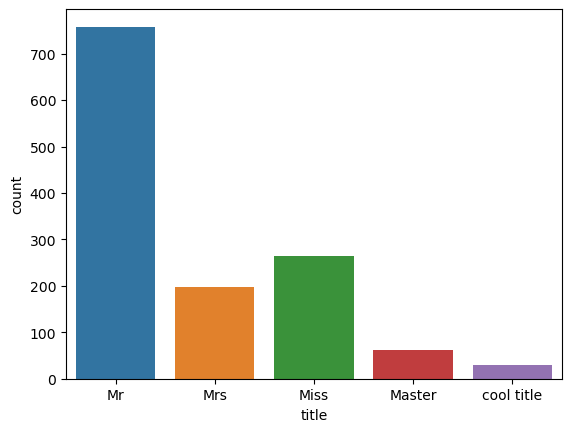

In [19]:
sns.countplot(x='title', data=df)
sns.countplot(x='title', data=df)

In [20]:
df["CategoryAge"] = pd.qcut(df["Age"], q=4, labels = False) #creates four categories for the age
df["CategoryFare"] = pd.qcut(df["Fare"], q=4, labels = False) #the same for the fare
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,title,CategoryAge,CategoryFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [21]:
df = pd.get_dummies(df) #converts to binary
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,HasCabin,CategoryAge,CategoryFare,"Name_Abbing, Mr. Anthony",...,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_cool title
0,1,3,22.0,1,0,7.2500,False,0,0,False,...,False,False,False,False,True,False,False,True,False,False
1,2,1,38.0,1,0,71.2833,True,3,3,False,...,False,False,True,False,False,False,False,False,True,False
2,3,3,26.0,0,0,7.9250,False,1,1,False,...,False,False,False,False,True,False,True,False,False,False
3,4,1,35.0,1,0,53.1000,True,2,3,False,...,False,False,False,False,True,False,False,False,True,False
4,5,3,35.0,0,0,8.0500,False,2,1,False,...,False,False,False,False,True,False,False,True,False,False
